## **Importing the necessary Libraries & Modules**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px


from pathlib import Path
import os
import glob

import warnings
from statsmodels.tools.sm_exceptions import ConvergenceWarning
warnings.simplefilter('ignore', ConvergenceWarning)
warnings.filterwarnings('ignore')

## **Setting The Environment**

In [2]:
# getting the cwd
working_dir = Path.cwd()
# getting the path of the src folder
src = working_dir.parents[1]
# setting the directory for the final datasets
final_data_dir = src / 'data' / 'final'
# directory for the raw data 
raw_data_dir = src / 'data' / 'raw'
# directory for the processed data 
processed_data_dir = src / 'data' / 'processed'

## **Merging all the datasets pertaining to GFS into one Data Frame**

In [3]:
# Totally there are 8 datasets perataining to GFS
# saving their names in a list
bhopal_filenames = [file_name for file_name in glob.glob(str(raw_data_dir) + "/*.csv") if os.path.basename(file_name).startswith('GFS_Bhopal')]

# Combine all files in the list
gfs_df = pd.concat([pd.read_csv(f) for f in bhopal_filenames])
gfs_df['date'] = pd.to_datetime(gfs_df['date'],format='%y-%m-%d')

In [4]:
gfs_df.head()

,date,city,temperature_2m_above_ground,specific_humidity_2m_above_ground,relative_humidity_2m_above_ground,u_component_of_wind_10m_above_ground,v_component_of_wind_10m_above_ground,precipitable_water_entire_atmosphere,total_precipitation_surface
0,2015-04-01,Bhopal,31.381519,0.005640,19.084161,4.671449,-0.277626,19.053919,0.0
1,2015-04-02,Bhopal,31.612318,0.006702,22.664057,5.663895,-0.951907,19.920647,0.0
2,2015-04-03,Bhopal,30.854070,0.006804,23.969701,5.704286,-0.857162,19.664423,0.0
3,2015-04-04,Bhopal,30.046127,0.008165,30.080859,2.575579,-1.547093,24.770628,0.0
4,2015-04-05,Bhopal,30.523074,0.007366,26.557658,-0.549178,-0.442961,23.765168,0.0


In [5]:
gfs_df.shape

(3147, 9)

In [6]:
gfs_df.tail()

,date,city,temperature_2m_above_ground,specific_humidity_2m_above_ground,relative_humidity_2m_above_ground,u_component_of_wind_10m_above_ground,v_component_of_wind_10m_above_ground,precipitable_water_entire_atmosphere,total_precipitation_surface
343,2023-12-10,Bhopal,18.811834,0.006121,43.662294,-1.405728,-0.565707,12.593095,0.000389
344,2023-12-11,Bhopal,18.872122,0.006296,44.810857,-1.503734,-0.283899,14.011080,0.028797
345,2023-12-12,Bhopal,18.785527,0.005872,42.018555,-1.647457,-0.419264,13.332485,0.010552
346,2023-12-13,Bhopal,18.444809,0.005759,42.108677,-1.865238,-0.799219,14.464455,0.015756
347,2023-12-14,Bhopal,18.650056,0.005858,42.060450,-1.756230,-0.815621,13.921977,0.000171


In [7]:
gfs_df.describe().T

,count,mean,std,min,25%,50%,75%,max
temperature_2m_above_ground,3147.0,1.120433e+15,6.285417e+16,14.319980,22.685267,26.001753,30.714626,3.526001e+18
specific_humidity_2m_above_ground,3147.0,1.275396e-02,1.544542e-01,0.002064,0.005188,0.007549,0.016433,8.668938e+00
relative_humidity_2m_above_ground,3147.0,4.543933e+01,2.475442e+01,6.948661,24.856172,39.345853,68.742206,9.153140e+01
u_component_of_wind_10m_above_ground,3147.0,1.591564e+00,4.930974e+00,-5.569351,-0.661148,1.344172,3.711401,2.420341e+02
v_component_of_wind_10m_above_ground,3147.0,-7.091064e-01,1.077224e+00,-4.556643,-1.405165,-0.806897,-0.071909,1.673568e+01
precipitable_water_entire_atmosphere,3147.0,3.034214e+01,1.836002e+01,4.866504,15.021756,22.526799,49.913735,6.688052e+01
total_precipitation_surface,3147.0,5.729789e-01,9.779145e-01,-0.970291,0.000981,0.035105,0.806079,7.303167e+00


In [8]:
# checking for null values
print(f'The number of null values in the GFS dataset are: {gfs_df.isna().sum().sum()}')

The number of null values in the GFS dataset are: 0


## **Loading the GLDAS dataset**

In [9]:
# loading the file path of the gldas dataset
gldas_file = os.path.join(raw_data_dir,'GLDAS_Bhopal_2010_2023.csv')
gldas_df = pd.read_csv(gldas_file)
gldas_df['date'] = pd.to_datetime(gldas_df['date'],format = '%y-%m-%d')

In [10]:
# Drop the columns that have all 0 values
gldas_df.drop(['SWE_tavg', 'SnowDepth_tavg', 'Qsb_tavg', 'Qsm_tavg', 'EvapSnow_tavg'], axis=1, inplace=True)
gldas_df.head()

,date,city,ACond_tavg,AvgSurfT_tavg,CanopInt_tavg,ECanop_tavg,ESoil_tavg,Evap_tavg,GWS_tavg,Lwnet_tavg,...,Qh_tavg,Qle_tavg,Qs_tavg,SnowT_tavg,SoilMoist_P_tavg,SoilMoist_RZ_tavg,SoilMoist_S_tavg,Swnet_tavg,TVeg_tavg,TWS_tavg
0,2010-01-01,Bhopal,0.010088,287.688380,0.001156,2.932935e-08,0.000012,0.000015,883.827648,-90.931169,...,37.562870,35.926709,0.000000e+00,287.688380,1172.228199,288.400510,5.566383,151.129770,0.000002,1172.229304
1,2010-01-02,Bhopal,0.010061,289.268913,0.000401,2.920452e-09,0.000012,0.000015,883.432609,-68.572377,...,42.294629,36.103128,0.000000e+00,289.268913,1171.363238,287.930671,5.547952,145.878682,0.000002,1171.363680
2,2010-01-03,Bhopal,0.010747,292.449339,0.000948,7.901975e-09,0.000014,0.000017,883.026668,-53.388871,...,37.794927,42.585784,3.507778e-10,292.449339,1170.347264,287.320660,5.488808,141.945173,0.000003,1170.348275
3,2010-01-04,Bhopal,0.011983,289.668102,0.000724,1.918644e-08,0.000011,0.000013,882.605022,-76.923632,...,49.884944,33.185483,0.000000e+00,289.668102,1169.410008,286.805072,5.509292,146.034988,0.000002,1169.410822
4,2010-01-05,Bhopal,0.010241,287.474046,0.000275,1.576623e-09,0.000011,0.000013,882.173136,-91.107395,...,45.596330,32.737269,0.000000e+00,287.474046,1168.653461,286.480318,5.510678,153.171961,0.000002,1168.653736


In [11]:
gldas_df.tail()

,date,city,ACond_tavg,AvgSurfT_tavg,CanopInt_tavg,ECanop_tavg,ESoil_tavg,Evap_tavg,GWS_tavg,Lwnet_tavg,...,Qh_tavg,Qle_tavg,Qs_tavg,SnowT_tavg,SoilMoist_P_tavg,SoilMoist_RZ_tavg,SoilMoist_S_tavg,Swnet_tavg,TVeg_tavg,TWS_tavg
4924,2023-06-26,Bhopal,0.014880,301.319386,0.010942,0.000002,0.000024,0.000028,821.132273,-3.098705,...,42.815345,68.294639,0.000004,301.319386,1119.148058,298.015849,6.533273,103.863962,0.000002,1119.159069
4925,2023-06-27,Bhopal,0.016214,301.113478,0.010765,0.000002,0.000026,0.000030,822.014210,0.347042,...,34.966429,74.206189,0.000018,301.113478,1123.364814,301.350545,6.898181,101.200953,0.000002,1123.375532
4926,2023-06-28,Bhopal,0.016272,300.568071,0.012465,0.000002,0.000031,0.000037,823.678898,4.282264,...,31.559352,90.448594,0.000053,300.568071,1134.990114,311.311238,7.512892,109.385402,0.000003,1135.002598
4927,2023-06-29,Bhopal,0.017152,300.438963,0.012693,0.000002,0.000028,0.000034,826.473011,4.832132,...,38.382987,84.663859,0.000030,300.438963,1144.042161,317.569183,7.319170,111.313468,0.000004,1144.054883
4928,2023-06-30,Bhopal,0.016794,300.249694,0.013172,0.000002,0.000025,0.000032,829.937107,1.440541,...,30.057209,79.849653,0.000008,300.249694,1151.335034,321.397936,7.022767,102.562258,0.000005,1151.348196


In [12]:
gldas_df.shape

(4929, 21)

In [13]:
# checking for null values
print(f'The number of null values in the gldas dataset is: {gldas_df.isna().sum().sum()}')

The number of null values in the gldas dataset is: 0


## **Loading the Bhopal Population dataset**

In [14]:
Pop_file = os.path.join(processed_data_dir,'Population data/Bhopal-population-2023-11-22.csv')
Pop_df = pd.read_csv(Pop_file)
Pop_df['date'] = pd.to_datetime(Pop_df['date'],format='%Y-%m-%d')
Pop_df.head()

,date,Population,Annual Change
0,1950-12-31,100000,NaN
1,1951-12-31,105000,5.00
2,1952-12-31,114000,8.57
3,1953-12-31,123000,7.89
4,1954-12-31,133000,8.13


In [15]:
Pop_df.tail()

,date,Population,Annual Change
81,2031-12-31,3075000,2.23
82,2032-12-31,3142000,2.18
83,2033-12-31,3211000,2.20
84,2034-12-31,3279000,2.12
85,2035-12-31,3348000,2.10


In [16]:
Pop_df.shape

(86, 3)

In [17]:
# finding the number of null values in the population data
print(f'The number of null values in the Population dataset is: {Pop_df.isna().sum().sum()}')

The number of null values in the Population dataset is: 1


## **Loading the Open Meteo API Weather dataset**

In [18]:
Ppt_file = os.path.join(processed_data_dir,'Weather data\Bhopal_Daily_Rainfall_Data_1970_2023.csv')
Ppt_df = pd.read_csv(Ppt_file,usecols=['date','precipitation_sum'])

In [19]:
Ppt_df.head()

,date,precipitation_sum
0,1969-12-31 18:30:00,0.0
1,1970-01-01 18:30:00,0.0
2,1970-01-02 18:30:00,0.0
3,1970-01-03 18:30:00,0.0
4,1970-01-04 18:30:00,0.0


In [20]:
Ppt_df.describe()

,precipitation_sum
count,19663.000000
mean,3.023216
std,10.506666
min,0.000000
25%,0.000000
50%,0.000000
75%,0.900000
max,283.600000


In [21]:
Ppt_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19663 entries, 0 to 19662
Data columns (total 2 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   date               19663 non-null  object 
 1   precipitation_sum  19663 non-null  float64
dtypes: float64(1), object(1)
memory usage: 307.4+ KB


In [22]:
Ppt_df['date'] = pd.to_datetime(Ppt_df['date'],format='%Y-%m-%d')
Ppt_df.head()

,date,precipitation_sum
0,1969-12-31 18:30:00,0.0
1,1970-01-01 18:30:00,0.0
2,1970-01-02 18:30:00,0.0
3,1970-01-03 18:30:00,0.0
4,1970-01-04 18:30:00,0.0


In [23]:
# removing the timestamp from the date variable 
Ppt_df['date'] = Ppt_df['date'].dt.floor('d')
Ppt_df.head()

,date,precipitation_sum
0,1969-12-31,0.0
1,1970-01-01,0.0
2,1970-01-02,0.0
3,1970-01-03,0.0
4,1970-01-04,0.0


In [24]:
Ppt_df.tail()

,date,precipitation_sum
19658,2023-10-27,0.0
19659,2023-10-28,0.0
19660,2023-10-29,0.0
19661,2023-10-30,0.0
19662,2023-10-31,0.0


In [25]:
Ppt_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19663 entries, 0 to 19662
Data columns (total 2 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   date               19663 non-null  datetime64[ns]
 1   precipitation_sum  19663 non-null  float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 307.4 KB


In [26]:
Ppt_df.shape

(19663, 2)

In [27]:
# checking for null values
print(f'The number of null values in the Precipitation dataset is: {Ppt_df.isna().sum().sum()}')

The number of null values in the Precipitation dataset is: 0


## **Checking for different info from the date column of the datasets**

### **Checking the date range**

In [28]:
print('The date range for the datasets are as follows:')
print("GFS: ", gfs_df['date'].min(), gfs_df['date'].max())
print("GLADS: ", gldas_df['date'].min(), gldas_df['date'].max())
print("Population: ", Pop_df['date'].min(), Pop_df['date'].max())
print("Weather: ", Ppt_df['date'].min(), Ppt_df['date'].max())


The date range for the datasets are as follows:
GFS:  2015-04-01 00:00:00 2023-12-14 00:00:00
GLADS:  2010-01-01 00:00:00 2023-06-30 00:00:00
Population:  1950-12-31 00:00:00 2035-12-31 00:00:00
Weather:  1969-12-31 00:00:00 2023-10-31 00:00:00


### **Checking the missing dates in the GFS dataset**

In [29]:
start_date = gfs_df['date'].min()
end_date = gfs_df['date'].max()

In [30]:
# creating a set of dates in between the start & end date
dates1 = set(elem.strftime('%Y-%m-%d') for elem in pd.date_range(start_date,end_date))
# creating another set for storing the dates actually present in the gfs_df
dates2 = set(elem.strftime('%Y-%m-%d') for elem in gfs_df['date'])

# using the set().difference to find out those dates present in dates1 which are not in dates2
missing_dates = list(dates1.difference(dates2))

print(f'There are {len(missing_dates)} missing dates in the gfs dataset')
print('They are as follows: ')
print(missing_dates)

There are 33 missing dates in the gfs dataset
They are as follows: 
['2021-12-27', '2015-04-14', '2021-12-20', '2021-12-31', '2019-12-31', '2021-12-26', '2015-04-10', '2021-12-29', '2021-12-28', '2022-12-31', '2015-04-18', '2018-12-31', '2021-12-21', '2021-12-15', '2021-12-25', '2021-12-24', '2015-04-19', '2015-04-13', '2015-04-11', '2021-12-18', '2021-12-19', '2021-12-16', '2021-12-30', '2017-12-31', '2015-04-12', '2021-12-17', '2021-12-22', '2015-04-17', '2021-12-23', '2016-12-31', '2015-04-15', '2020-12-31', '2015-04-16']


### **Checking the missing dates in the GLDAS dataset**

In [31]:
start_date = gldas_df['date'].min()
end_date = gldas_df['date'].max()

In [32]:
# creating a set of dates in between the start & end date
dates1 = set(elem.strftime('%Y-%m-%d') for elem in pd.date_range(start_date,end_date))
# creating another set for storing the dates actually present in the gldas_df
dates2 = set(elem.strftime('%Y-%m-%d') for elem in gldas_df['date'])

# using the set().difference to find out those dates present in dates1 which are not in dates2
missing_dates = list(dates1.difference(dates2))

print(f'There are {len(missing_dates)} missing dates in the gldaS dataset')
print('They are as follows: ')
print(missing_dates)

There are 0 missing dates in the gldaS dataset
They are as follows: 
[]


In [33]:
Pop_df

,date,Population,Annual Change
0,1950-12-31,100000,NaN
1,1951-12-31,105000,5.00
2,1952-12-31,114000,8.57
3,1953-12-31,123000,7.89
4,1954-12-31,133000,8.13
...,...,...,...
81,2031-12-31,3075000,2.23
82,2032-12-31,3142000,2.18
83,2033-12-31,3211000,2.20
84,2034-12-31,3279000,2.12


### **Checking the missing dates in the Population dataset**

In [34]:
start_date = Pop_df['date'].min()
end_date = Pop_df['date'].max()

In [35]:
# creating a set of dates in between the start & end date
dates1 = set(elem.strftime('%Y-%m-%d') for elem in pd.date_range(start_date,end_date))
# creating another set for storing the dates actually present in the Pop_df
dates2 = set(elem.strftime('%Y-%m-%d') for elem in Pop_df['date'])

# using the set().difference to find out those dates present in dates1 which are not in dates2
missing_dates = list(dates1.difference(dates2))

print(f'There are {len(missing_dates)} missing dates in the Population dataset')
print('They are as follows: ')
print(missing_dates)

There are 30961 missing dates in the Population dataset
They are as follows: 
['2025-06-09', '2023-08-07', '2020-04-03', '2023-12-25', '2001-01-20', '1995-04-14', '1992-03-16', '2010-05-02', '1965-07-02', '1956-05-11', '1993-01-28', '2030-05-20', '2035-01-08', '1976-08-20', '1965-03-09', '1994-01-07', '1964-08-02', '2016-09-23', '2034-08-22', '2019-03-03', '2003-07-01', '1992-12-06', '2007-08-01', '2007-01-25', '1971-01-07', '1971-04-15', '1969-05-11', '2030-02-19', '2000-03-08', '1963-10-11', '2022-06-21', '2024-05-02', '1956-06-07', '1999-04-01', '1958-12-01', '1985-04-19', '2032-11-14', '1952-04-08', '1968-11-17', '1969-08-03', '1983-06-17', '2007-06-26', '2034-08-02', '2024-08-27', '1971-07-08', '2031-04-27', '2021-07-14', '2008-07-22', '1996-06-20', '2031-01-02', '2005-11-06', '1963-03-18', '1987-12-26', '2026-10-16', '1956-07-31', '2008-05-12', '2001-06-25', '1993-06-06', '1951-06-23', '1972-11-03', '1994-10-09', '2031-03-29', '2018-04-12', '2020-11-03', '1973-10-27', '2022-10-21

### **Checking the missing dates in the Weather dataset**

In [36]:
start_date = Ppt_df['date'].min()
end_date = Ppt_df['date'].max()

In [37]:
# creating a set of dates in between the start & end date
dates1 = set(elem.strftime('%Y-%m-%d') for elem in pd.date_range(start_date,end_date))
# creating another set for storing the dates actually present in the Ppt_df
dates2 = set(elem.strftime('%Y-%m-%d') for elem in Ppt_df['date'])

# using the set().difference to find out those dates present in dates1 which are not in dates2
missing_dates = list(dates1.difference(dates2))

print(f'There are {len(missing_dates)} missing dates in the Precipitation dataset')
print('They are as follows: ')
print(missing_dates)

There are 0 missing dates in the Precipitation dataset
They are as follows: 
[]


## **Merging the GLDAS, GFS & Weather datasets**

In [38]:
print(f"The GFS dataset starts at: {gfs_df['date'].min()} & ends at: {gfs_df['date'].max()}")
print(f"The GLDAS dataset starts at: {gldas_df['date'].min()} & ends at: {gldas_df['date'].max()}")
print(f"The Weather dataset starts at: {Ppt_df['date'].min()} & ends at: {Ppt_df['date'].max()}")

The GFS dataset starts at: 2015-04-01 00:00:00 & ends at: 2023-12-14 00:00:00
The GLDAS dataset starts at: 2010-01-01 00:00:00 & ends at: 2023-06-30 00:00:00
The Weather dataset starts at: 1969-12-31 00:00:00 & ends at: 2023-10-31 00:00:00


In [39]:
# dropping the city column in both gfs & gldas
gfs_df.drop('city',axis=1,inplace=True)
gldas_df.drop('city',axis=1,inplace=True)
# first merging gfs & gldas first
df1 = pd.merge(gfs_df,gldas_df,on='date',how='inner')
df1.head()

,date,temperature_2m_above_ground,specific_humidity_2m_above_ground,relative_humidity_2m_above_ground,u_component_of_wind_10m_above_ground,v_component_of_wind_10m_above_ground,precipitable_water_entire_atmosphere,total_precipitation_surface,ACond_tavg,AvgSurfT_tavg,...,Qh_tavg,Qle_tavg,Qs_tavg,SnowT_tavg,SoilMoist_P_tavg,SoilMoist_RZ_tavg,SoilMoist_S_tavg,Swnet_tavg,TVeg_tavg,TWS_tavg
0,2015-04-01,31.381519,0.005640,19.084161,4.671449,-0.277626,19.053919,0.0,0.009535,301.828791,...,57.287802,70.673777,0.000000e+00,301.828791,1153.966420,275.946408,4.782809,223.362352,6.349899e-07,1153.966582
1,2015-04-02,31.612318,0.006702,22.664057,5.663895,-0.951907,19.920647,0.0,0.011490,302.765242,...,60.882683,69.560302,0.000000e+00,302.765242,1151.749923,274.617967,4.659694,221.923497,4.469356e-07,1151.749969
2,2015-04-03,30.854070,0.006804,23.969701,5.704286,-0.857162,19.664423,0.0,0.012793,303.068777,...,65.454717,65.798244,0.000000e+00,303.068777,1149.649158,273.428841,4.484641,218.171090,3.210499e-07,1149.649124
3,2015-04-04,30.046127,0.008165,30.080859,2.575579,-1.547093,24.770628,0.0,0.014474,302.893081,...,84.828026,53.421145,0.000000e+00,302.893081,1147.826225,272.525414,4.354961,217.789598,2.082960e-07,1147.826188
4,2015-04-05,30.523074,0.007366,26.557658,-0.549178,-0.442961,23.765168,0.0,0.010641,302.875925,...,66.643473,46.833714,1.183570e-09,302.875925,1146.413800,272.040991,4.340641,175.870913,1.475418e-07,1146.414677


In [40]:
print(f"The merged gfs & gldas dataset starts at: {df1['date'].min()} & ends at: {df1['date'].max()}")

The merged gfs & gldas dataset starts at: 2015-04-01 00:00:00 & ends at: 2023-06-30 00:00:00


In [41]:
# merging df1 with the Ppt_df
df = pd.merge(df1,Ppt_df,on='date',how='inner')
df.head()

,date,temperature_2m_above_ground,specific_humidity_2m_above_ground,relative_humidity_2m_above_ground,u_component_of_wind_10m_above_ground,v_component_of_wind_10m_above_ground,precipitable_water_entire_atmosphere,total_precipitation_surface,ACond_tavg,AvgSurfT_tavg,...,Qle_tavg,Qs_tavg,SnowT_tavg,SoilMoist_P_tavg,SoilMoist_RZ_tavg,SoilMoist_S_tavg,Swnet_tavg,TVeg_tavg,TWS_tavg,precipitation_sum
0,2015-04-01,31.381519,0.005640,19.084161,4.671449,-0.277626,19.053919,0.0,0.009535,301.828791,...,70.673777,0.000000e+00,301.828791,1153.966420,275.946408,4.782809,223.362352,6.349899e-07,1153.966582,0.0
1,2015-04-02,31.612318,0.006702,22.664057,5.663895,-0.951907,19.920647,0.0,0.011490,302.765242,...,69.560302,0.000000e+00,302.765242,1151.749923,274.617967,4.659694,221.923497,4.469356e-07,1151.749969,0.0
2,2015-04-03,30.854070,0.006804,23.969701,5.704286,-0.857162,19.664423,0.0,0.012793,303.068777,...,65.798244,0.000000e+00,303.068777,1149.649158,273.428841,4.484641,218.171090,3.210499e-07,1149.649124,0.0
3,2015-04-04,30.046127,0.008165,30.080859,2.575579,-1.547093,24.770628,0.0,0.014474,302.893081,...,53.421145,0.000000e+00,302.893081,1147.826225,272.525414,4.354961,217.789598,2.082960e-07,1147.826188,0.0
4,2015-04-05,30.523074,0.007366,26.557658,-0.549178,-0.442961,23.765168,0.0,0.010641,302.875925,...,46.833714,1.183570e-09,302.875925,1146.413800,272.040991,4.340641,175.870913,1.475418e-07,1146.414677,0.0


In [42]:
print(f"The final merged dataset starts at: {df['date'].min()} & ends at: {df['date'].max()}")

The final merged dataset starts at: 2015-04-01 00:00:00 & ends at: 2023-06-30 00:00:00


In [43]:
df_copy = df.copy()
df_copy.head()

,date,temperature_2m_above_ground,specific_humidity_2m_above_ground,relative_humidity_2m_above_ground,u_component_of_wind_10m_above_ground,v_component_of_wind_10m_above_ground,precipitable_water_entire_atmosphere,total_precipitation_surface,ACond_tavg,AvgSurfT_tavg,...,Qle_tavg,Qs_tavg,SnowT_tavg,SoilMoist_P_tavg,SoilMoist_RZ_tavg,SoilMoist_S_tavg,Swnet_tavg,TVeg_tavg,TWS_tavg,precipitation_sum
0,2015-04-01,31.381519,0.005640,19.084161,4.671449,-0.277626,19.053919,0.0,0.009535,301.828791,...,70.673777,0.000000e+00,301.828791,1153.966420,275.946408,4.782809,223.362352,6.349899e-07,1153.966582,0.0
1,2015-04-02,31.612318,0.006702,22.664057,5.663895,-0.951907,19.920647,0.0,0.011490,302.765242,...,69.560302,0.000000e+00,302.765242,1151.749923,274.617967,4.659694,221.923497,4.469356e-07,1151.749969,0.0
2,2015-04-03,30.854070,0.006804,23.969701,5.704286,-0.857162,19.664423,0.0,0.012793,303.068777,...,65.798244,0.000000e+00,303.068777,1149.649158,273.428841,4.484641,218.171090,3.210499e-07,1149.649124,0.0
3,2015-04-04,30.046127,0.008165,30.080859,2.575579,-1.547093,24.770628,0.0,0.014474,302.893081,...,53.421145,0.000000e+00,302.893081,1147.826225,272.525414,4.354961,217.789598,2.082960e-07,1147.826188,0.0
4,2015-04-05,30.523074,0.007366,26.557658,-0.549178,-0.442961,23.765168,0.0,0.010641,302.875925,...,46.833714,1.183570e-09,302.875925,1146.413800,272.040991,4.340641,175.870913,1.475418e-07,1146.414677,0.0


In [44]:
df_copy.shape

(2980, 28)

### **Adding the population column into the merged dataset**

In [45]:
Pop_df['date']

0    1950-12-31
1    1951-12-31
2    1952-12-31
3    1953-12-31
4    1954-12-31
        ...    
81   2031-12-31
82   2032-12-31
83   2033-12-31
84   2034-12-31
85   2035-12-31
Name: date, Length: 86, dtype: datetime64[ns]

In [46]:
# adding a 'year' column to the Pop_df & The merged df
# so that the yearly population values can be added into the final data frame
Pop_df['year'] = Pop_df['date'].dt.year
df['year'] = df['date'].dt.year

In [47]:
Pop_df['year']

0     1950
1     1951
2     1952
3     1953
4     1954
      ... 
81    2031
82    2032
83    2033
84    2034
85    2035
Name: year, Length: 86, dtype: int64

In [48]:
Pop_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 86 entries, 0 to 85
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   date            86 non-null     datetime64[ns]
 1    Population     86 non-null     int64         
 2    Annual Change  85 non-null     float64       
 3   year            86 non-null     int64         
dtypes: datetime64[ns](1), float64(1), int64(2)
memory usage: 2.8 KB


In [49]:
df['population'] = [Pop_df[Pop_df['year']==year][' Population'].values[0] for year in df['year']]

In [50]:
df.head()

,date,temperature_2m_above_ground,specific_humidity_2m_above_ground,relative_humidity_2m_above_ground,u_component_of_wind_10m_above_ground,v_component_of_wind_10m_above_ground,precipitable_water_entire_atmosphere,total_precipitation_surface,ACond_tavg,AvgSurfT_tavg,...,SnowT_tavg,SoilMoist_P_tavg,SoilMoist_RZ_tavg,SoilMoist_S_tavg,Swnet_tavg,TVeg_tavg,TWS_tavg,precipitation_sum,year,population
0,2015-04-01,31.381519,0.005640,19.084161,4.671449,-0.277626,19.053919,0.0,0.009535,301.828791,...,301.828791,1153.966420,275.946408,4.782809,223.362352,6.349899e-07,1153.966582,0.0,2015,2108000
1,2015-04-02,31.612318,0.006702,22.664057,5.663895,-0.951907,19.920647,0.0,0.011490,302.765242,...,302.765242,1151.749923,274.617967,4.659694,221.923497,4.469356e-07,1151.749969,0.0,2015,2108000
2,2015-04-03,30.854070,0.006804,23.969701,5.704286,-0.857162,19.664423,0.0,0.012793,303.068777,...,303.068777,1149.649158,273.428841,4.484641,218.171090,3.210499e-07,1149.649124,0.0,2015,2108000
3,2015-04-04,30.046127,0.008165,30.080859,2.575579,-1.547093,24.770628,0.0,0.014474,302.893081,...,302.893081,1147.826225,272.525414,4.354961,217.789598,2.082960e-07,1147.826188,0.0,2015,2108000
4,2015-04-05,30.523074,0.007366,26.557658,-0.549178,-0.442961,23.765168,0.0,0.010641,302.875925,...,302.875925,1146.413800,272.040991,4.340641,175.870913,1.475418e-07,1146.414677,0.0,2015,2108000


In [51]:
df.shape

(2980, 30)

In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2980 entries, 0 to 2979
Data columns (total 30 columns):
 #   Column                                Non-Null Count  Dtype         
---  ------                                --------------  -----         
 0   date                                  2980 non-null   datetime64[ns]
 1   temperature_2m_above_ground           2980 non-null   float64       
 2   specific_humidity_2m_above_ground     2980 non-null   float64       
 3   relative_humidity_2m_above_ground     2980 non-null   float64       
 4   u_component_of_wind_10m_above_ground  2980 non-null   float64       
 5   v_component_of_wind_10m_above_ground  2980 non-null   float64       
 6   precipitable_water_entire_atmosphere  2980 non-null   float64       
 7   total_precipitation_surface           2980 non-null   float64       
 8   ACond_tavg                            2980 non-null   float64       
 9   AvgSurfT_tavg                         2980 non-null   float64       
 10  

In [53]:
print(f"The final dataset starts at: {df['date'].min()} & ends at: {df['date'].max()}")

The final dataset starts at: 2015-04-01 00:00:00 & ends at: 2023-06-30 00:00:00


In [54]:
# checking for the missing dates
start_date = df['date'].min()
end_date = df['date'].max()

# creating sets of dates 
set1 = set(dates.strftime("%Y-%m-%d") for dates in pd.date_range(start_date,end_date))
set2 = set(dates.strftime("%Y-%m-%d") for dates in df['date'])

# finding the difference between the two dates
missing_dates = list(set1.difference(set2))

print(f'The new data frame has: {len(missing_dates)} missing days')
print(f'The missing dates are: {missing_dates}')

The new data frame has: 33 missing days
The missing dates are: ['2021-12-27', '2015-04-14', '2021-12-20', '2021-12-31', '2019-12-31', '2021-12-26', '2015-04-10', '2021-12-29', '2021-12-28', '2022-12-31', '2015-04-18', '2018-12-31', '2021-12-21', '2021-12-15', '2021-12-25', '2021-12-24', '2015-04-19', '2015-04-13', '2015-04-11', '2021-12-18', '2021-12-19', '2021-12-16', '2021-12-30', '2017-12-31', '2015-04-12', '2021-12-17', '2021-12-22', '2015-04-17', '2021-12-23', '2016-12-31', '2015-04-15', '2020-12-31', '2015-04-16']


## **Feature Engineering**

### **Calculation of Water Scarcity: Explanation**

Water Availability is basically the difference between the **Quantity Of Water Supplied** by a city or a region with the **Water Demand** in the same region, i.e:

    Daily Water Availability (MLD) = Daily Quantity Of Water Supplied - Water Demand

_NOTE: The unit MLD indicates Million Litres per day_

Water Availability can be either positive or negative:

1. A Positive value indicates there is no scarcity of water at that point in time.
    
2. A Negative value indicates there is scarcity of water at that point in time.

The calculation of **Water Demand** is fairly simple: 

    Water Demand (MLD) = Per-Capita Demand (lpcd) x Population x 10^(-6)

_NOTE_: 

1. _The per-capita demand indicates the average amount of water an individual will consume for domestic purposes like bathing, drinking etc. This value varies with several factors, but the government of the region in concern usually prescribes a minimum value of per-capita demand that has to be satisfied under normal conditions. This is the value we will be taking. For Bhopal (& most probably for algeria too) we will take it as 200 lpcd_. 

2. _lpcd indicates Litres per capita per day_

Now moving on with the calculation of **Daily Quantity Of Water Supplied**, we are assuming it to have two components:

1. A static value (i.e., this value will be assumed to be constant throughout our calculations) which will be provided by the government from various water sources - This will be termed as the **Storage (S)**

2. A variable value which we have to calculate using our data - This will be termed as **Change in Storage (delta S)**

Therefore,

    Daily Quantity Of Water Supplied = S + del S

The **Storage (S)** value is just the sum of the water supplied (in MLD) from various water bodies. 

As mentioned above, the **Change in Storage (delta S)** has to be calculated using the available data. This value can be calculated by using the hydrological concept called, **The Water Budget Equation**, which calculates the change in the storage of a water body by taking into account various factors that increase or decrease the storage of the water body. To put it simply, the **Change in Storage (delta S)** of a water body (in our case we are considering the cumulative of all the major water bodies present in the region) can be calculated as follows: 

    del S (MLD) = Precipitation - Evapotranspiration - Surface Water Runoff

_NOTE: Precipitation is obtained from the Open API Weather dataset, Evapotranspiration & Surface Water Runoff from the GLDAS dataset_

    Since we need to get the final unit of del S in MLD & as the units for all the three variables: Precipitation, Evapotranspiration & Surface Water Runoff are different from MLD, we need to convert them to MLD.

**Conversion of Daily Precipitation from mm per day to Million Litres per day**

Precipitation (in m^3 per day) = Precipitation (in mm) x 10^(-3) x (Sum of the surface areas of all the Major Water bodies x 10^(6) (in m^2))

As 1 m^3 = 1000 Litres, 

Precipitation (in Litres per Day) = Precipitation (in mm) x (Sum of the surface areas of All the Major Water bodies) x 10^(6)

Therefore: 

    Precipitation (in MLD) = Precipitation (in mm) x (Sum of the surface areas of All the Major Water bodies)


**Conversion of Evapotranspiration from (kg/m^2)/s to Million Litres per day**

As:
1. 1 kg = 0.001 m^3
2. 1 day = 86400 s


Evapotranspiration (in m^3 per day) = Evapotranspiration (in kg/m^2/s) x 0.001 x 86400 x (Sum of the surface areas of All the Major Water bodies x 10^(6) (in m^2)) 

As 1 m^3 = 1000 Litres,

Evapotranspiration (in Litres per Day) = Evapotranspiration (in kg/m^2/s) x (Sum of the surface areas of All the Major Water bodies) x 86.4 x 10^(9) 

Therefore:

    Evapotranspiration (in MLD) = Evapotranspiration (in kg/m^2/s) x (Sum of the surface areas of All the Major Water bodies) x 86.4 x 10^(3)
     

Similarly,

**Conversion of Surface Water Runoff from (kg/m^2)/s to Million Litres per day**

Surface Water Runoff (in m^3 per day) = Surface Water Runoff (in kg/m^2/s) x 0.001 x 86400 x (Sum of the surface areas of All the Major Water bodies x 10^(6) (in m^2))

As 1 m^3 = 1000 Litres,

Surface Water Runoff (in Litres per Day) = Surface Water Runoff (in kg/m^2/s) x (Sum of the surface areas of All the Major Water bodies) x 86.4 x 10^(9)

Therefore:

    Surface Water Runoff (in MLD) = Surface Water Runoff (in kg/m^2/s) x (Sum of the surface areas of All the Major Water bodies) x 86.4 x 10^(3)


_NOTE: The unit of Sum of the surface areas in all the above calculations is km^2_

### **Sample Calculations for Bhopal**

The sources of water include:

1. Upper Lake - 108 MLD
2. Kolar dam - 153 MLD
3. Narmada River - 185 MLD

Thus the gross target supply is = 108 + 153 + 185 = 446 MLD

Assuming a water leakage loss of 15% (the range is 9% to 20%),

The Storage (net supply of water) is = 446*0.85 = 379.1 MLD

We can take the above to be a static value (i.e., this value will be fixed throughout).

The variable value will be the change in storage (del S) which I presented earlier (which is calculated by taking the precipitation, evapotranspiration into factor), 

Say this change in storage for a given year is 90 MLD,

Therefore the Available water 
= Net supply of water + Change in storage 
= 379.1 + 90 
= 469.1 MLD

If we take the population as say 2500000 and the per-capita demand as 200 lpcd,
The water demand is = 500 MLD

Now water scarcity 
= Available water - Demand 
= 469.1 - 500 
= -30.9 MLD

**IMPORTANT ASSUMPTION IN THE CALCULATIONS**: 

Out of the water resources mentioned above, we only need the water surface info of the Upper lake (which we already know to be 36 km^2), because this is the only water source present within Bhopal City & thus we will be able to use our gldas/gfs data to calculate the evapotranspiration & precipitation for this water body, whereas the sources 2 & 3 are located more than 50km away from the city, and hence there will be no need of taking into account these factors as our data doesn't account for the evapotranspiration & precipitation of these water bodies which are located far away from the city.

In [55]:
df_copy = df.copy()

### **Creating new features based on the above formulae**

In [56]:
# The area of the Upper lake in km^2
Upper_lake_area = 36
# Fixed storage (S) value (in MLD) as explained from the above calculations
Storage = 379.1
# Daily per-capita demand (in lpcd)
per_capita_demand = 200

# Daily water demand in MLD
df_copy['Water_demand'] = per_capita_demand*df_copy['population']*10**(-6)

# Precipitation in MLD
df_copy['Precipitation in MLD'] = df_copy['precipitation_sum']*Upper_lake_area

# Evapotranspiration in MLD
df_copy['Evapotranspiration in MLD'] = df_copy['Evap_tavg']*Upper_lake_area*86.4*10**(3)

# Surface water runoff in MLD
df_copy['Surface Water Runoff in MLD'] = df_copy['Qs_tavg']*Upper_lake_area*86.4*10**(3)

# Change in storage (del S) in MLD
df_copy['del_S'] = df_copy['Precipitation in MLD']-df_copy['Evapotranspiration in MLD']-df_copy['Surface Water Runoff in MLD']

# Daily Quantity of water supplied in MLD
df_copy['Water_Supply'] = Storage + df_copy['del_S']

# Available water in MLD
df_copy['Water_availability'] = df_copy['Water_Supply']-df_copy['Water_demand']



In [57]:
df_copy.head(20)

,date,temperature_2m_above_ground,specific_humidity_2m_above_ground,relative_humidity_2m_above_ground,u_component_of_wind_10m_above_ground,v_component_of_wind_10m_above_ground,precipitable_water_entire_atmosphere,total_precipitation_surface,ACond_tavg,AvgSurfT_tavg,...,precipitation_sum,year,population,Water_demand,Precipitation in MLD,Evapotranspiration in MLD,Surface Water Runoff in MLD,del_S,Water_Supply,Water_availability
0,2015-04-01,31.381519,0.005640,19.084161,4.671449,-0.277626,19.053919,0.000000,0.009535,301.828791,...,0.0,2015,2108000,421.6,0.0,89.123746,0.000000,-89.123746,289.976254,-131.623746
1,2015-04-02,31.612318,0.006702,22.664057,5.663895,-0.951907,19.920647,0.000000,0.011490,302.765242,...,0.0,2015,2108000,421.6,0.0,87.719587,0.000000,-87.719587,291.380413,-130.219587
2,2015-04-03,30.854070,0.006804,23.969701,5.704286,-0.857162,19.664423,0.000000,0.012793,303.068777,...,0.0,2015,2108000,421.6,0.0,82.975412,0.000000,-82.975412,296.124588,-125.475412
3,2015-04-04,30.046127,0.008165,30.080859,2.575579,-1.547093,24.770628,0.000000,0.014474,302.893081,...,0.0,2015,2108000,421.6,0.0,67.367171,0.000000,-67.367171,311.732829,-109.867171
4,2015-04-05,30.523074,0.007366,26.557658,-0.549178,-0.442961,23.765168,0.000000,0.010641,302.875925,...,0.0,2015,2108000,421.6,0.0,59.060037,0.003681,-59.063718,320.036282,-101.563718
5,2015-04-06,31.331483,0.006444,22.599808,-1.260076,-0.196799,20.435948,0.000798,0.010338,303.878387,...,0.0,2015,2108000,421.6,0.0,59.233261,0.003368,-59.236629,319.863371,-101.736629
6,2015-04-07,31.251757,0.005891,20.289495,-1.749863,-2.115206,20.282480,0.000000,0.012480,304.350699,...,0.7,2015,2108000,421.6,25.2,58.071437,0.001865,-32.873302,346.226698,-75.373302
7,2015-04-08,31.267945,0.005169,17.478191,-1.806096,-2.268756,20.161514,0.000037,0.011518,303.660167,...,0.0,2015,2108000,421.6,0.0,64.906020,0.046157,-64.952177,314.147823,-107.452177
8,2015-04-09,32.653239,0.005449,17.231744,-0.445111,-1.269736,21.296700,0.020192,0.009514,304.439080,...,0.3,2015,2108000,421.6,10.8,63.778730,0.000000,-52.978730,326.121270,-95.478730
9,2015-04-20,35.743145,0.005077,13.432305,3.535092,-2.387829,19.133918,0.000000,0.008560,307.599166,...,0.0,2015,2108000,421.6,0.0,89.336923,0.000000,-89.336923,289.763077,-131.836923


In [58]:
df_copy.tail(20)

,date,temperature_2m_above_ground,specific_humidity_2m_above_ground,relative_humidity_2m_above_ground,u_component_of_wind_10m_above_ground,v_component_of_wind_10m_above_ground,precipitable_water_entire_atmosphere,total_precipitation_surface,ACond_tavg,AvgSurfT_tavg,...,precipitation_sum,year,population,Water_demand,Precipitation in MLD,Evapotranspiration in MLD,Surface Water Runoff in MLD,del_S,Water_Supply,Water_availability
2960,2023-06-11,34.390252,0.012813,37.713345,5.794917,-0.165677,42.099095,0.290171,0.015446,312.050797,...,0.100000,2023,2565000,513.0,3.600000,20.677806,0.000007,-17.077813,362.022187,-150.977813
2961,2023-06-12,33.758917,0.013412,41.067794,5.594379,0.047330,44.290372,0.374635,0.014175,312.975167,...,0.000000,2023,2565000,513.0,0.000000,21.921765,0.002647,-21.924412,357.175588,-155.824412
2962,2023-06-13,33.313911,0.013548,42.685314,5.880990,0.847689,44.289015,0.554879,0.014868,312.618045,...,0.000000,2023,2565000,513.0,0.000000,21.988099,0.000279,-21.988378,357.111622,-155.888378
2963,2023-06-14,32.171455,0.014258,47.873128,5.410515,0.736314,47.072894,0.686813,0.018208,311.684049,...,0.000000,2023,2565000,513.0,0.000000,18.903771,0.000064,-18.903835,360.196165,-152.803835
2964,2023-06-15,31.100056,0.014704,52.890957,5.243481,0.932275,48.525690,1.079919,0.016162,311.525040,...,0.000000,2023,2565000,513.0,0.000000,19.261376,0.000000,-19.261376,359.838624,-153.161376
2965,2023-06-16,29.877131,0.015600,58.808605,5.080522,0.960209,52.687913,1.035259,0.016951,311.643722,...,0.000000,2023,2565000,513.0,0.000000,17.614364,0.000000,-17.614364,361.485636,-151.514364
2966,2023-06-17,28.776449,0.016375,65.021669,4.585394,0.264637,56.498301,1.952534,0.019803,310.374618,...,0.200000,2023,2565000,513.0,7.200000,17.087010,0.000677,-9.887687,369.212313,-143.787687
2967,2023-06-18,28.085329,0.016892,69.260758,4.465393,-0.037359,58.277578,2.583700,0.020605,309.391111,...,0.600000,2023,2565000,513.0,21.600000,18.556067,0.002584,3.041349,382.141349,-130.858651
2968,2023-06-19,28.084300,0.016788,68.524267,4.620771,0.034049,58.129046,2.069712,0.020505,307.184951,...,3.400000,2023,2565000,513.0,122.399996,35.823756,0.022123,86.554117,465.654117,-47.345883
2969,2023-06-20,28.237145,0.016597,67.452940,4.647694,-0.294813,56.907229,2.076166,0.015377,305.997768,...,0.800000,2023,2565000,513.0,28.800000,86.736921,0.476500,-58.413421,320.686579,-192.313421


In [59]:
df_copy.describe().T

,count,mean,std,min,25%,50%,75%,max
temperature_2m_above_ground,2980.0,1.183222e+15,6.459134e+16,1.431998e+01,2.265673e+01,2.615319e+01,3.118399e+01,3.526001e+18
specific_humidity_2m_above_ground,2980.0,1.273180e-02,1.587201e-01,2.064001e-03,5.105326e-03,7.321222e-03,1.614382e-02,8.668938e+00
relative_humidity_2m_above_ground,2980.0,4.439723e+01,2.459622e+01,6.948661e+00,2.397865e+01,3.830022e+01,6.551592e+01,9.153140e+01
u_component_of_wind_10m_above_ground,2980.0,1.603169e+00,5.038575e+00,-5.569351e+00,-6.588203e-01,1.342600e+00,3.725964e+00,2.420341e+02
v_component_of_wind_10m_above_ground,2980.0,-7.251943e-01,1.090489e+00,-4.556643e+00,-1.417310e+00,-8.292992e-01,-8.039994e-02,1.673568e+01
precipitable_water_entire_atmosphere,2980.0,2.987652e+01,1.822549e+01,4.866504e+00,1.483900e+01,2.224218e+01,4.918849e+01,6.688052e+01
total_precipitation_surface,2980.0,5.571084e-01,9.680916e-01,-9.702911e-01,8.804113e-04,3.358717e-02,7.609376e-01,7.303167e+00
ACond_tavg,2980.0,1.209568e-02,3.917698e-03,6.004456e-03,9.134998e-03,1.123732e-02,1.427196e-02,3.471947e-02
AvgSurfT_tavg,2980.0,2.997586e+02,6.927656e+00,2.837911e+02,2.945195e+02,2.991693e+02,3.041527e+02,3.168918e+02
CanopInt_tavg,2980.0,8.820776e-03,1.560878e-02,1.041701e-06,7.661654e-05,6.358938e-04,1.025128e-02,8.288598e-02


In [60]:
df_copy.head()

,date,temperature_2m_above_ground,specific_humidity_2m_above_ground,relative_humidity_2m_above_ground,u_component_of_wind_10m_above_ground,v_component_of_wind_10m_above_ground,precipitable_water_entire_atmosphere,total_precipitation_surface,ACond_tavg,AvgSurfT_tavg,...,precipitation_sum,year,population,Water_demand,Precipitation in MLD,Evapotranspiration in MLD,Surface Water Runoff in MLD,del_S,Water_Supply,Water_availability
0,2015-04-01,31.381519,0.005640,19.084161,4.671449,-0.277626,19.053919,0.0,0.009535,301.828791,...,0.0,2015,2108000,421.6,0.0,89.123746,0.000000,-89.123746,289.976254,-131.623746
1,2015-04-02,31.612318,0.006702,22.664057,5.663895,-0.951907,19.920647,0.0,0.011490,302.765242,...,0.0,2015,2108000,421.6,0.0,87.719587,0.000000,-87.719587,291.380413,-130.219587
2,2015-04-03,30.854070,0.006804,23.969701,5.704286,-0.857162,19.664423,0.0,0.012793,303.068777,...,0.0,2015,2108000,421.6,0.0,82.975412,0.000000,-82.975412,296.124588,-125.475412
3,2015-04-04,30.046127,0.008165,30.080859,2.575579,-1.547093,24.770628,0.0,0.014474,302.893081,...,0.0,2015,2108000,421.6,0.0,67.367171,0.000000,-67.367171,311.732829,-109.867171
4,2015-04-05,30.523074,0.007366,26.557658,-0.549178,-0.442961,23.765168,0.0,0.010641,302.875925,...,0.0,2015,2108000,421.6,0.0,59.060037,0.003681,-59.063718,320.036282,-101.563718


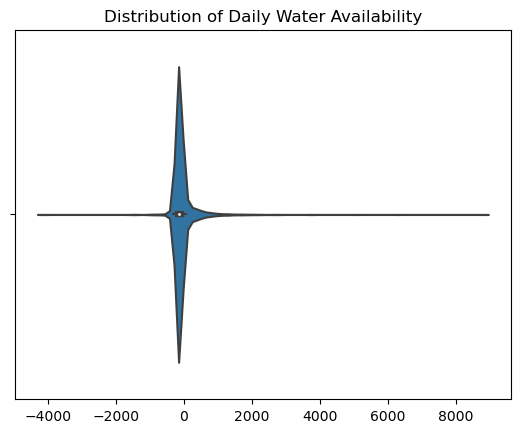

<Figure size 1000x600 with 0 Axes>

In [61]:
sns.violinplot(df_copy['Water_availability'].values,linewidth=1.5)
plt.title('Distribution of Daily Water Availability')
plt.figure(figsize=(10,6))
plt.show()

In [62]:
df_copy1 = df_copy.copy()
df_copy1.set_index('date',inplace=True)

In [63]:
fig = px.line(df_copy1,y=df_copy1['Water_availability'],title='Time Series of water availability')
fig.update_layout(
        font=dict(size=12, color='black'),
        autosize=False,
        width=1000,
        height=800
    )
fig.show()

### **Splitting the dataset**

In [64]:
# dropping the following columns: 
# year, population, Precipitation in MLD, Evapotranspiration in MLD, Surface Water Runoff in MLD
df_copy.drop(['year','population','Precipitation in MLD','Evapotranspiration in MLD','Surface Water Runoff in MLD'],axis=1,inplace=True)

# training dataset is from 2015 to 2021
training_data = df_copy[df_copy['date']<='2021-12-01']
# testing dataset is from 2022 to 2023
testing_data = df_copy[df_copy['date']>='2022-01-01']

In [65]:
training_data.shape

(2422, 32)

In [66]:
testing_data.shape

(545, 32)

In [67]:
training_data.head()

,date,temperature_2m_above_ground,specific_humidity_2m_above_ground,relative_humidity_2m_above_ground,u_component_of_wind_10m_above_ground,v_component_of_wind_10m_above_ground,precipitable_water_entire_atmosphere,total_precipitation_surface,ACond_tavg,AvgSurfT_tavg,...,SoilMoist_RZ_tavg,SoilMoist_S_tavg,Swnet_tavg,TVeg_tavg,TWS_tavg,precipitation_sum,Water_demand,del_S,Water_Supply,Water_availability
0,2015-04-01,31.381519,0.005640,19.084161,4.671449,-0.277626,19.053919,0.0,0.009535,301.828791,...,275.946408,4.782809,223.362352,6.349899e-07,1153.966582,0.0,421.6,-89.123746,289.976254,-131.623746
1,2015-04-02,31.612318,0.006702,22.664057,5.663895,-0.951907,19.920647,0.0,0.011490,302.765242,...,274.617967,4.659694,221.923497,4.469356e-07,1151.749969,0.0,421.6,-87.719587,291.380413,-130.219587
2,2015-04-03,30.854070,0.006804,23.969701,5.704286,-0.857162,19.664423,0.0,0.012793,303.068777,...,273.428841,4.484641,218.171090,3.210499e-07,1149.649124,0.0,421.6,-82.975412,296.124588,-125.475412
3,2015-04-04,30.046127,0.008165,30.080859,2.575579,-1.547093,24.770628,0.0,0.014474,302.893081,...,272.525414,4.354961,217.789598,2.082960e-07,1147.826188,0.0,421.6,-67.367171,311.732829,-109.867171
4,2015-04-05,30.523074,0.007366,26.557658,-0.549178,-0.442961,23.765168,0.0,0.010641,302.875925,...,272.040991,4.340641,175.870913,1.475418e-07,1146.414677,0.0,421.6,-59.063718,320.036282,-101.563718


In [68]:
testing_data.head()

,date,temperature_2m_above_ground,specific_humidity_2m_above_ground,relative_humidity_2m_above_ground,u_component_of_wind_10m_above_ground,v_component_of_wind_10m_above_ground,precipitable_water_entire_atmosphere,total_precipitation_surface,ACond_tavg,AvgSurfT_tavg,...,SoilMoist_RZ_tavg,SoilMoist_S_tavg,Swnet_tavg,TVeg_tavg,TWS_tavg,precipitation_sum,Water_demand,del_S,Water_Supply,Water_availability
2435,2022-01-01,18.301797,0.007695,56.643939,-1.643093,-0.584867,22.510895,0.161284,0.009205,290.077060,...,301.478202,5.937676,113.089359,0.000004,1227.251248,0.000000,501.0,-41.642233,337.457767,-163.542233
2436,2022-01-02,17.857911,0.007962,60.310401,-1.488433,-0.309931,22.516758,0.353586,0.009172,290.599721,...,301.252813,5.921228,123.678205,0.000005,1226.660441,0.000000,501.0,-47.402289,331.697711,-169.302289
2437,2022-01-03,18.092715,0.008071,60.935248,-1.673682,-0.380697,22.784478,0.337878,0.007890,290.406086,...,300.971606,5.913948,129.075918,0.000005,1226.007440,0.000000,501.0,-47.752989,331.347011,-169.652989
2438,2022-01-04,18.292371,0.008296,62.098417,-1.343831,-0.674816,22.987746,0.258376,0.007410,291.271647,...,300.527585,5.874026,132.073751,0.000006,1225.183737,0.200000,501.0,-50.488416,328.611584,-172.388416
2439,2022-01-05,17.985828,0.008540,64.981693,-1.196424,-0.982014,22.589843,0.251203,0.010040,292.962801,...,300.794211,6.123887,109.031300,0.000006,1225.091514,7.599999,501.0,210.651975,589.751975,88.751975
